
注意该算法在解决具体问题时需要注意以下几点： 1.种群大小m m很小很容易陷入局部最优，m很大，pso的优化能力很好，当种群数目增长至一定水平时，再增长将不再有显著的作用。 2.权重因子 对于粒子的速度更新的三部分： a. 惯性因子w=1表示基本的粒子群算法，w=0表示失去对粒子本身的速度记忆。 b. 自我认知部分的学习因子c1=0表示无私型的粒子群算法，只有社会，没有自我，这样会使群体丧失多样性，从而容易导致陷入局部最优而无法跳出。 c. 社会经验部分的学习因子c2=0表示自我型的粒子群算法，只有自我没有社会，这样导致没有信息的社会共享，算法收敛速度缓慢。 这三个参数的选择非常重要，如何调整这三个参数使算法避免早熟又可以比较快的收敛，对于解决实际问题意义较大。 3.最大速度 速度限制的作用为：维护算法的探索能力与开发能力的平衡。 $V_m$较大时，探索能力强，但是粒子容易飞过最优解 $V_m$较小时，开发能力强，但是容易陷入局部最优解 $V_m$一般设定为每维变量变化范围的10%~20% 4.停止准则 a.最大迭代次数 b.可以接受的满意解（通过fitness function判断是否满意） 5.粒子空间的初始化 较好地选择粒子的初始化空间，将大大缩短收敛时间．初始化空间根据具体问题的不同而不同，根据具体问题进行设定． 该算法为数不多的关键参数的设置却对算法的精度和效率有 着显著影响

In [3]:
import numpy as np
np.zeros((2, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

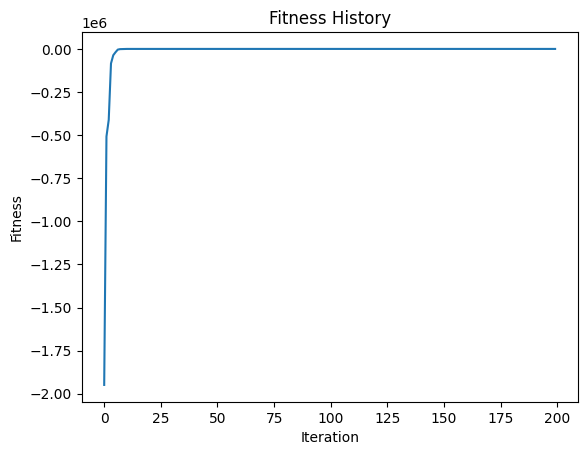

In [11]:

import numpy as np
from typing import Optional, List, Callable

class PSO:
    '''
    默认求解最大化 fitness 问题
    '''
    def __init__(self, D, fitness:Callable[[np.ndarray], float], N = 100, G = 50, v_bound = [-1, 1], x_low: Optional[List[int]] = None, x_high: Optional[List[int]] = None) -> None:
        self.D = D
        self.N = N
        self.G = G
        self.fitness = fitness
        self.fitness_list = []
        # 二维的约束矩阵 2 * D
        self.default_min = -10000
        self.default_max = 10000
        self.x_bound = np.zeros((2, D))
        self.v_bound = v_bound
        if x_low is not None:
            self.x_bound[0] = x_low
        # 没有约束情况
        else:
            self.x_bound[0] = np.full(D, self.default_min)
        if x_high is not None:
            self.x_bound[1] = x_high
        else:
            self.x_bound[1] = np.full(D, self.default_max)
        self.x = np.random.uniform(self.x_bound[0], self.x_bound[1], (N, D))
        self.v = np.random.uniform(v_bound[0], v_bound[1], (N, D))
        self.p_best = self.x.copy()
        self.g_best = self.p_best[np.argmax(self.fitness(self.p_best))]

    def update(self):
        w = 0.8  # 惯性权重
        c1 = 2.   # 个人学习因子
        c2 = 2.   # 社会学习因子

        # 对于种群中每一个个体:
        for i in range(self.N):
            r1 = np.random.rand(self.D) # 和 random.uniform(0, 1) 哪个好？
            r2 = np.random.rand(self.D)
            # 粒子群算法速度更新公式和位置更新公式
            self.v[i] = w * self.v[i] + c1 * r1 * (self.p_best[i] - self.x[i]) + c2 * r2 * (self.g_best - self.x[i])
            self.x[i] += self.v[i]
            # 位置和速度限制
            self.x[i] = np.clip(self.x[i], self.x_bound[0], self.x_bound[1])
            self.v[i] = np.clip(self.v[i], self.v_bound[0], self.v_bound[1])
            # 更新个体最优和全局最优
            if self.fitness(self.x[i]) > self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.p_best[i]) > self.fitness(self.g_best):
                self.g_best = self.p_best[i]
        self.fitness_list.append(self.fitness(self.g_best))

    def pso(self):
        for i in range(self.G):
            self.update()
        return self.g_best, self.fitness(self.g_best)

    def draw_fitness_history(self):
        import matplotlib.pyplot as plt
        idx = [i for i in range(len(self.fitness_list))]
        plt.plot(idx, self.fitness_list)
        plt.xlabel('Iteration')
        plt.ylabel('Fitness')
        plt.title('Fitness History')
        plt.show()


pso = PSO(5, lambda x: -(x[0]-1)**2 - (x[1]-2.5)**2 - (x[2]-3)**2 - (x[3]-4)**2 - (x[4]-5)**2, N=100, G=200, v_bound=[-1, 1])
pso.pso()
# print(len(pso.fitness_list))
pso.draw_fitness_history()